In [92]:
import pandas as pd
import numpy as np
import datetime
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Time Series Analysis: Working With Time Series Data
___

## Exercises:

In [93]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


# 1a.)
 - Resample by the day and take the average temperature. Visualize the average temperature over time.

In [94]:
sf_temps = sf_temps.set_index('date').sort_index()

In [95]:
sf_temps.resample('D').mean()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49
...,...
2010-12-27,48.99
2010-12-28,49.00
2010-12-29,49.01


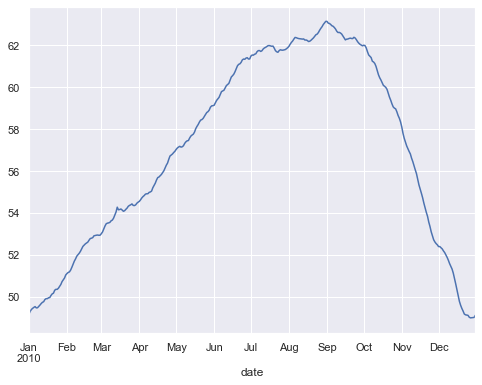

In [96]:
sf_temps.resample('D').mean().temp.plot();

# 1b.)
 - Write the code necessary to visualize the minimum temperature over time.

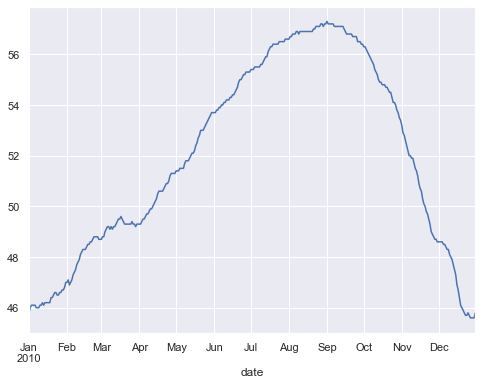

In [98]:
sf_temps.resample('D').min().temp.plot();

# 1c. 
 -  Write the code necessary to visualize the maximum temperature over time.

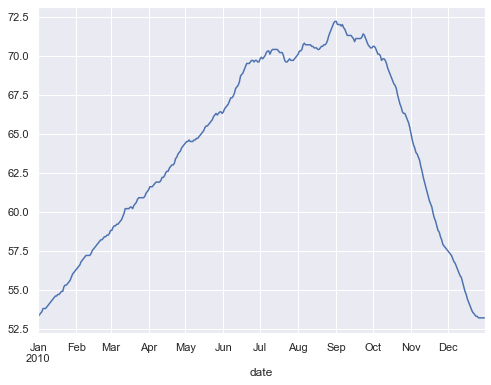

In [102]:
sf_temps.resample('d').max().temp.plot();

# 1d. 
 -  Which month is the coldest, on average?
 
 ### January is the coldest month.

In [103]:
lowest_avg_temp = sf_temps.resample('M').temp.mean().min()
lowest_avg_temp

49.984139784946244

In [105]:
sf_temps['avg_monthly_temp'] = sf_temps.resample('M').temp.transform('mean')
sf_temps.avg_monthly_temp.min()

49.984139784946244

In [107]:
sf_temps['month'] = sf_temps.index.month_name()
sf_temps.head()

,temp,avg_monthly_temp,month
date,,,
2010-01-01 00:00:00,47.80,49.98,January
2010-01-01 01:00:00,47.40,49.98,January
2010-01-01 02:00:00,46.90,49.98,January
2010-01-01 03:00:00,46.50,49.98,January
2010-01-01 04:00:00,46.00,49.98,January


In [108]:
coldest_month = sf_temps['month'][sf_temps['avg_monthly_temp'] == lowest_avg_temp]
coldest_month[1]

'January'

#  1e. 
 - Which month has the highest average temperature?
### September has the highest average temperature.

In [109]:
highest_avg_temp = sf_temps.resample('M').temp.mean().max()
highest_avg_temp

62.48708333333335

In [110]:
hottest_month = sf_temps['month'][sf_temps['avg_monthly_temp'] == highest_avg_temp]
hottest_month[1]

'September'

 # 1f. 
  - Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [112]:
sf_temps['max_day_temp'] = sf_temps.resample('D').temp.transform('max')
sf_temps['min_day_temp'] = sf_temps.resample('D').temp.transform('min')
sf_temps

,temp,avg_monthly_temp,month,max_day_temp,min_day_temp
date,,,,,
2010-01-01 00:00:00,47.80,49.98,January,53.30,45.80
2010-01-01 01:00:00,47.40,49.98,January,53.30,45.80
2010-01-01 02:00:00,46.90,49.98,January,53.30,45.80
2010-01-01 03:00:00,46.50,49.98,January,53.30,45.80
2010-01-01 04:00:00,46.00,49.98,January,53.30,45.80
...,...,...,...,...,...
2010-12-31 19:00:00,50.40,50.50,December,53.20,45.80
2010-12-31 20:00:00,49.90,50.50,December,53.20,45.80
2010-12-31 21:00:00,49.40,50.50,December,53.20,45.80


In [113]:
sf_temps['temp_delta_per_day'] = sf_temps['max_day_temp'] - sf_temps['min_day_temp']
sf_temps.head()

,temp,avg_monthly_temp,month,max_day_temp,min_day_temp,temp_delta_per_day
date,,,,,,
2010-01-01 00:00:00,47.80,49.98,January,53.30,45.80,7.50
2010-01-01 01:00:00,47.40,49.98,January,53.30,45.80,7.50
2010-01-01 02:00:00,46.90,49.98,January,53.30,45.80,7.50
2010-01-01 03:00:00,46.50,49.98,January,53.30,45.80,7.50
2010-01-01 04:00:00,46.00,49.98,January,53.30,45.80,7.50


In [114]:
sf_temps['month'][sf_temps.temp_delta_per_day == sf_temps.temp_delta_per_day.max()][1]

'August'

###  Bonus # 1: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

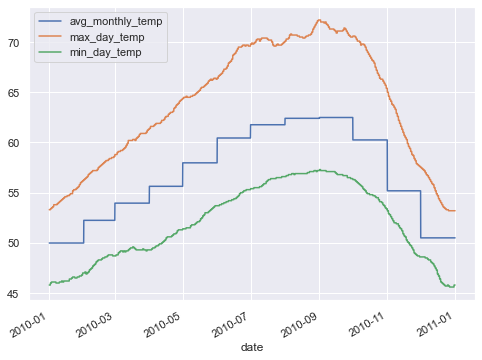

In [115]:
df_plot = pd.DataFrame(sf_temps, columns=['avg_monthly_temp','max_day_temp', 'min_day_temp'])

df_plot.plot(legend=True);

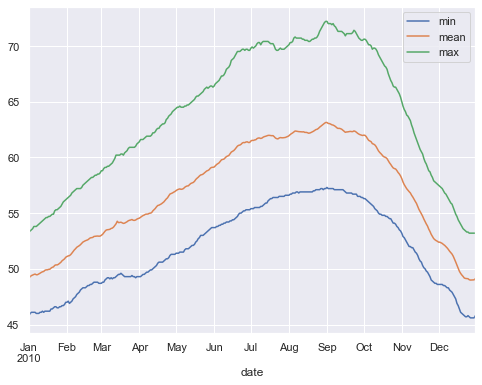

In [116]:
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot();

_____


# 2a. 
-  Which year and month combination has the highest amount of precipitation?

In [134]:
from vega_datasets import data
se_weather = data.seattle_weather()
se_weather['yr'] = se_weather.date.dt.year
se_weather['month'] = se_weather.date.dt.month
se_weather['yr_month'] = se_weather['date'].dt.to_period('M')
se_weather

,date,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,2012-01
1,2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2012-01
2,2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,2012-01
3,2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,2012-01
4,2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,2012-01
...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog,2015,12,2015-12
1457,2015-12-28,1.50,5.00,1.70,1.30,fog,2015,12,2015-12
1458,2015-12-29,0.00,7.20,0.60,2.60,fog,2015,12,2015-12
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun,2015,12,2015-12


In [135]:
se_weather.precipitation.max()

55.9

In [136]:
max_rain = se_weather[se_weather.precipitation == se_weather.precipitation.max()]
max_rain.yr_month

1169    2015-03
Name: yr_month, dtype: period[M]

# 2b. 
-  Visualize the amount of monthly precipitation over time.

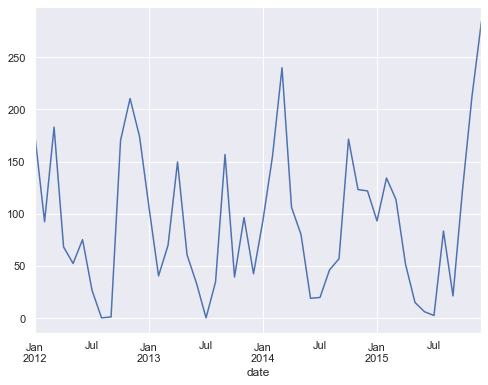

In [137]:
se_weather = se_weather.set_index('date').sort_index()

se_weather.precipitation.resample('M').sum().plot();

# 2c. 
-  Visualize the amount of wind over time. Choose a time interval you think is appropriate.

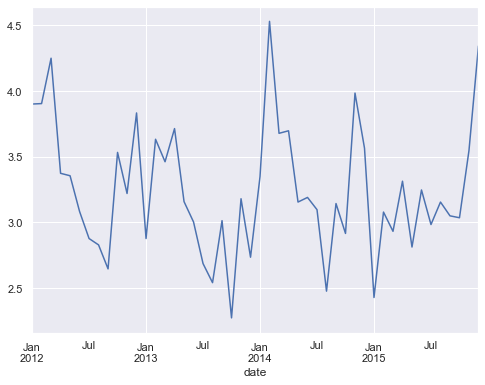

In [138]:
se_weather.wind.resample('M').mean().plot();

# 2d.
-  Which year-month combination is the windiest?

In [139]:
max_wind = se_weather[se_weather.wind == se_weather.wind.max()]
max_wind.yr_month

date
2012-12-17    2012-12
Name: yr_month, dtype: period[M]

# 2e.
-  What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [140]:
se_weather.groupby('weather').resample('Y').size().unstack()

date,2012-12-31,2013-12-31,2014-12-31,2015-12-31
weather,,,,
drizzle,31.00,16.00,0.00,7.00
fog,5.00,82.00,151.00,173.00
rain,191.00,60.00,3.00,5.00
snow,21.00,2.00,NaN,NaN
sun,118.00,205.00,211.00,180.00


2014 has the highest amount of sun.

# 2f.
 -  In which month does it rain the most?

In [142]:
se_weather.groupby('weather').resample('Y').size().unstack()

date,2012-12-31,2013-12-31,2014-12-31,2015-12-31
weather,,,,
drizzle,31.00,16.00,0.00,7.00
fog,5.00,82.00,151.00,173.00
rain,191.00,60.00,3.00,5.00
snow,21.00,2.00,NaN,NaN
sun,118.00,205.00,211.00,180.00


December 2012 had the most rain.

 # 2g. 
   -  Which month has the most number of days with a non-zero amount of precipitation?

In [144]:
se_weather['no_rain'] =  se_weather.precipitation > 0
se_weather.head()

,precipitation,temp_max,temp_min,wind,weather,yr,month,yr_month,no_rain
date,,,,,,,,,
2012-01-01,0.00,12.80,5.00,4.70,drizzle,2012,1,2012-01,False
2012-01-02,10.90,10.60,2.80,4.50,rain,2012,1,2012-01,True
2012-01-03,0.80,11.70,7.20,2.30,rain,2012,1,2012-01,True
2012-01-04,20.30,12.20,5.60,4.70,rain,2012,1,2012-01,True
2012-01-05,1.30,8.90,2.80,6.10,rain,2012,1,2012-01,True


In [145]:
se_weather.groupby('month').no_rain.sum().sort_values()

month
7     11
8     22
5     34
9     35
6     37
4     59
10    61
1     66
11    71
2     73
3     73
12    81
Name: no_rain, dtype: int64

December had the most number of days with non-zero amounts of precipitation.

___
# 3a.
 - Convert any negative delays to 0.

In [147]:
flights = data.flights_20k()
flights.delay = np.where(flights.delay < 0, 0, flights.delay)
flights

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


# 3b. 
 - Which hour of the day has the highest average delay?

In [151]:
flights.groupby(flights.date.dt.hour).delay.mean().sort_values().tail(3)

date
0   127.92
1   170.00
3   302.50
Name: delay, dtype: float64

# 3c.
 - Does the day of the week make a difference in the delay amount?

In [152]:
flights.groupby(flights.date.dt.day_name()).delay.mean().sort_values()

date
Monday       7.17
Saturday     8.43
Tuesday      9.41
Sunday      10.41
Wednesday   11.03
Thursday    12.82
Friday      17.76
Name: delay, dtype: float64

Yes, but slightly. Friday has the biggest difference.

# 3d.
 - Does the month make a difference in the delay amount?

In [155]:
flights.groupby(flights.date.dt.month_name()).delay.mean().sort_values()

date
March       9.88
January    11.30
February   12.31
Name: delay, dtype: float64

Slighty. Day of the week makes a bigger difference, but February has the most delays by a small margin.

____

## Bonus # 1:

In [157]:
from vega_datasets import data
electricity = data.iowa_electricity()
electricity.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


### 1a.
- For each row, calculate the percentage of the year's total that energy source provided.